In [1]:
# load general tools
import sys
sys.path.append("../..")
from IPython.display import display
%matplotlib inline
import numpy as np
import networkx as nx
from IPython.display import Image
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
pd.set_option('display.precision', 2)
pd.set_option('display.max_colwidth', 30)

In [2]:
# load magine specific tools
import magine.ontology.enrichment_tools as et
from magine.plotting.heatmaps import  heatmap_from_array
from magine.plotting.wordcloud_tools import create_wordcloud
from magine.plotting.venn_diagram_maker import create_venn2
import magine.data.tools as tools
import magine.networks.visualization.notebook_tools as nt
import magine.networks.visualization.notebooks.view as view

# Exploring enrichment output

Here we load in the results from enrichR

In [16]:
enrichment_array = pd.read_csv('cisplatin_enrichment.csv.gz', index_col=0)
enrichment_array['significant_flag'] = False
enrichment_array.loc[enrichment_array['adj_p_value']<=0.05, 'significant_flag'] = True

In [17]:
# clean up printing by selecting fewer columns
cols = ['term_name', 'rank', 'combined_score', 'n_genes', 'genes', 'sample_id']

In [18]:
display(enrichment_array.head(5))

,term_name,rank,combined_score,adj_p_value,genes,n_genes,sample_id,category,db,significant_flag
0,Spliceosome_Homo sapiens_h...,1,90.50,3.36e-20,"ALYREF,DDX39B,DDX5,HNRNPA1...",37,01hr,proteomics_both,KEGG_2016,True
1,Ribosome_Homo sapiens_hsa0...,2,55.24,1.48e-12,"RPL11,RPL13,RPL13A,RPL14,R...",29,01hr,proteomics_both,KEGG_2016,True
2,Salmonella infection_Homo ...,3,16.06,5.47e-03,"ARPC1A,ARPC4,DYNC1H1,DYNC2...",12,01hr,proteomics_both,KEGG_2016,True
3,Bacterial invasion of epit...,4,12.60,2.64e-02,"ARPC1A,ARPC4,CAV1,CD2AP,CL...",10,01hr,proteomics_both,KEGG_2016,True
4,Ubiquitin mediated proteol...,5,12.00,2.64e-02,"BRCA1,CDC16,CDC20,CUL3,CUL...",14,01hr,proteomics_both,KEGG_2016,True


In [9]:
display(enrichment_array[cols].head(5))

,term_name,rank,combined_score,n_genes,genes,sample_id
0,Spliceosome_hsa,1,90.50,37,"ALYREF,DDX39B,DDX5,HNRNPA1...",01hr
1,Ribosome_hsa,2,55.24,29,"RPL11,RPL13,RPL13A,RPL14,R...",01hr
2,Salmonella infection_hsa,3,16.06,12,"ARPC1A,ARPC4,DYNC1H1,DYNC2...",01hr
3,Bacterial invasion of epit...,4,12.60,10,"ARPC1A,ARPC4,CAV1,CD2AP,CL...",01hr
4,Ubiquitin mediated proteol...,5,12.00,14,"BRCA1,CDC16,CDC20,CUL3,CUL...",01hr


In [10]:
# filter only sig terms
sig = enrichment_array[enrichment_array['significant_flag']].copy()

## Filtering and searching the dataframe

In [11]:
# Filter by terms
d = et.filter_based_on_words(sig, ['axon'])
display(d.sort_values('combined_score', ascending=False).head(5))

,term_name,rank,combined_score,adj_p_value,genes,n_genes,sample_id,category,db,significant_flag
284860,Axon guidance_hsa,9,40.21,2.50e-06,"ABL2,ADAM10,ALCAM,ARHGAP35...",76,06hr,rna_down,Reactome_2016,True
73006,Axon guidance_hsa,48,36.92,6.95e-08,"ABL2,ACTR3,ALCAM,AP2B1,ARA...",85,48hr,proteomics_both,Reactome_2016,True
286191,axon guidance,11,36.02,3.75e-04,"ARHGAP35,BDNF,ENAH,EPHB2,E...",26,06hr,rna_down,GO_Biological_Process_2017,True
397533,Axon guidance_hsa,7,31.12,1.75e-04,"ABL2,ADAM10,ALCAM,ARHGAP35...",86,06hr,rna_both,Reactome_2016,True
48283,Axon guidance_hsa,47,30.42,1.75e-06,"ABL2,ABLIM1,AKAP9,ALCAM,AR...",75,24hr,proteomics_both,Reactome_2016,True


## Data stats

In [12]:
# column types
print(enrichment_array.dtypes)

# databases 
print(enrichment_array['db'].unique())

term_name            object
rank                  int64
combined_score      float64
adj_p_value         float64
genes                object
n_genes               int64
sample_id            object
category             object
db                   object
significant_flag       bool
dtype: object
['KEGG_2016' 'NCI-Nature_2016' 'Panther_2016' 'WikiPathways_2016'
 'BioCarta_2016' 'Humancyc_2016' 'Reactome_2016' 'KEA_2015'
 'GO_Biological_Process_2017' 'GO_Molecular_Function_2017'
 'GO_Cellular_Component_2017' 'ChEA_2016' 'TRANSFAC_and_JASPAR_PWMs'
 'ENCODE_TF_ChIP-seq_2015' 'Kinase_Perturbations_from_GEO_down'
 'Kinase_Perturbations_from_GEO_up'
 'LINCS_L1000_Kinase_Perturbations_down'
 'LINCS_L1000_Kinase_Perturbations_up'
 'Ligand_Perturbations_from_GEO_down' 'Ligand_Perturbations_from_GEO_up'
 'DrugMatrix' 'Drug_Perturbations_from_GEO_2014']


In [13]:
phenotype = et.filter_dataframe(enrichment_array,
                                p_value=0.05,
                                combined_score=0.0,
                                db='dbGaP', 
                                rank=50
                               )

phenotype['term_name'] = phenotype['term_name'].str.split(' \(', 1).str.get(0)
display(phenotype[cols].head(10))

dbGaP not in ['KEGG_2016', 'NCI-Nature_2016', 'Panther_2016', 'WikiPathways_2016', 'BioCarta_2016', 'Reactome_2016', 'KEA_2015', 'GO_Biological_Process_2017', 'GO_Molecular_Function_2017', 'GO_Cellular_Component_2017', 'ChEA_2016', 'TRANSFAC_and_JASPAR_PWMs', 'ENCODE_TF_ChIP-seq_2015', 'Kinase_Perturbations_from_GEO_down', 'Kinase_Perturbations_from_GEO_up', 'LINCS_L1000_Kinase_Perturbations_down', 'LINCS_L1000_Kinase_Perturbations_up', 'Ligand_Perturbations_from_GEO_down', 'Ligand_Perturbations_from_GEO_up', 'DrugMatrix', 'Drug_Perturbations_from_GEO_2014', 'Humancyc_2016']


,term_name,rank,combined_score,n_genes,genes,sample_id
76745,RNA binding,1,2708.88,415,"ACAA2,ACIN1,ACO1,ACTN4,ADA...",48hr
51864,RNA binding,1,2276.06,366,"ACIN1,ACO1,ACTN4,ADD1,AGFG...",24hr
168608,RNA binding,1,1657.51,255,"ACO1,ADAR,ADD1,AGFG1,AHNAK...",48hr
99301,RNA binding,1,1409.58,155,"ADAR,ADD1,AHNAK,ALDOA,ALKB...",01hr
236404,RNA binding,1,1374.55,214,"ACIN1,ACTN4,ADD1,AHNAK,AKA...",24hr
3696,RNA binding,1,1273.21,192,"ADAR,ADD1,AHNAK,ALDOA,ALKB...",01hr
260076,RNA binding,1,1243.87,204,"ACAA2,ACIN1,ACTN4,AHNAK,AL...",48hr
27437,RNA binding,1,1226.32,219,"AATF,ACIN1,ADD1,AGFG1,AHNA...",06hr
144973,RNA binding,1,1128.78,200,"ACO1,AGFG1,AHNAK,ANKHD1,AN...",24hr
213088,RNA binding,1,810.70,132,"AATF,ACIN1,ADD1,AHNAK,ANP3...",06hr


In [11]:
word_cloud = create_wordcloud(phenotype)

In [12]:
word_cloud.data.head(10)

,words,counts
1021,estradiol,506
1033,17beta estradiol,339
348,interleukin,208
1282,syk,167
1875,growth factor,132
1187,akt1,97
1520,imatinib,85
532,triiodothyronine,82
1355,cell cycle,79
946,interleukin icirc,79


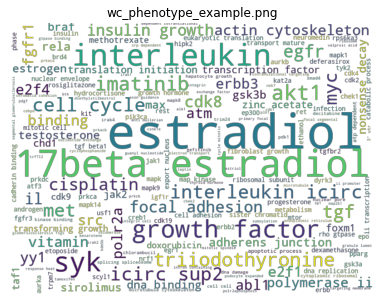

In [13]:
word_cloud.plot('wc_phenotype_example.png')

In [14]:
drug_dbs = [#'Kinase_Perturbations_from_GEO_down', 'Kinase_Perturbations_from_GEO_up',
#             'LINCS_L1000_Kinase_Perturbations_down', 'LINCS_L1000_Kinase_Perturbations_up',
#             'Ligand_Perturbations_from_GEO_down', 'Ligand_Perturbations_from_GEO_up', 
#             'Drug_Perturbations_from_GEO_2014'
#             'Old_CMAP_down', 'Old_CMAP_up',
            
            'Human_Phenotype_Ontology', 
#             'MGI_Mammalian_Phenotype_2017',
#             'Jensen_DISEASES', 
#             'dbGaP',
#             'DrugMatrix',
            
]

drug = et.filter_dataframe(enrichment_array, 
                           p_value=0.05,
#                            combined_score=0.0, 
                           db='Human_Phenotype_Ontology',
                           rank=25,
#                            category='rna_up',
                        )
display(drug.head(10))

Human_Phenotype_Ontology not in ['KEGG_2016', 'NCI-Nature_2016', 'Panther_2016', 'WikiPathways_2016', 'BioCarta_2016', 'Reactome_2016', 'KEA_2015', 'GO_Biological_Process_2017', 'GO_Molecular_Function_2017', 'GO_Cellular_Component_2017', 'ChEA_2016', 'TRANSFAC_and_JASPAR_PWMs', 'ENCODE_TF_ChIP-seq_2015', 'Kinase_Perturbations_from_GEO_down', 'Kinase_Perturbations_from_GEO_up', 'LINCS_L1000_Kinase_Perturbations_down', 'LINCS_L1000_Kinase_Perturbations_up', 'Ligand_Perturbations_from_GEO_down', 'Ligand_Perturbations_from_GEO_up', 'DrugMatrix', 'Drug_Perturbations_from_GEO_2014', 'Humancyc_2016']
          term_name  rank  combined_score  adj_p_value  \
76745   RNA binding     1         2708.88    7.84e-153   
51864   RNA binding     1         2276.06    4.39e-128   
168608  RNA binding     1         1657.51     8.15e-93   
99301   RNA binding     1         1409.58     8.14e-79   
236404  RNA binding     1         1374.55     1.20e-76   
3696    RNA binding     1         1273.21     6.83e

,term_name,rank,combined_score,adj_p_value,genes,n_genes,sample_id,category,db,significant_flag
76745,RNA binding,1,2708.88,7.84e-153,"ACAA2,ACIN1,ACO1,ACTN4,ADA...",415,48hr,proteomics_both,GO_Molecular_Function_2017,True
51864,RNA binding,1,2276.06,4.39e-128,"ACIN1,ACO1,ACTN4,ADD1,AGFG...",366,24hr,proteomics_both,GO_Molecular_Function_2017,True
168608,RNA binding,1,1657.51,8.15e-93,"ACO1,ADAR,ADD1,AGFG1,AHNAK...",255,48hr,proteomics_down,GO_Molecular_Function_2017,True
99301,RNA binding,1,1409.58,8.14e-79,"ADAR,ADD1,AHNAK,ALDOA,ALKB...",155,01hr,proteomics_down,GO_Molecular_Function_2017,True
236404,RNA binding,1,1374.55,1.20e-76,"ACIN1,ACTN4,ADD1,AHNAK,AKA...",214,24hr,proteomics_up,GO_Molecular_Function_2017,True
3696,RNA binding,1,1273.21,6.83e-71,"ADAR,ADD1,AHNAK,ALDOA,ALKB...",192,01hr,proteomics_both,GO_Molecular_Function_2017,True
260076,RNA binding,1,1243.87,3.56e-69,"ACAA2,ACIN1,ACTN4,AHNAK,AL...",204,48hr,proteomics_up,GO_Molecular_Function_2017,True
27437,RNA binding,1,1226.32,3.58e-68,"AATF,ACIN1,ADD1,AGFG1,AHNA...",219,06hr,proteomics_both,GO_Molecular_Function_2017,True
144973,RNA binding,1,1128.78,1.30e-62,"ACO1,AGFG1,AHNAK,ANKHD1,AN...",200,24hr,proteomics_down,GO_Molecular_Function_2017,True
213088,RNA binding,1,810.70,1.60e-44,"AATF,ACIN1,ADD1,AHNAK,ANP3...",132,06hr,proteomics_up,GO_Molecular_Function_2017,True


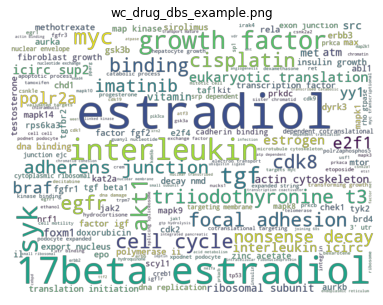

In [15]:
display(drug.sort_values('combined_score', ascending=False))
word_cloud = create_wordcloud(drug)
word_cloud.plot('wc_drug_dbs_example.png')

In [16]:
word_cloud.word_dict

{'pdgf plk1': 2,
 'nascent adherens': 4,
 'distal enhancer': 2,
 'oxidative stress': 3,
 'peroxisome proliferator': 7,
 'bexarotene': 12,
 'involved ubiquitin': 2,
 'regulatory region': 3,
 'phosphorylation': 4,
 'alpha pparalpha': 2,
 'trpm7': 12,
 'mitochondrial inner': 3,
 'mechanism import': 5,
 'stabilization expansion': 8,
 'lyn': 5,
 'tead2': 2,
 'tead4': 5,
 'mevalonate': 2,
 'actomyosin structure': 1,
 'binding clock': 4,
 'transduction oncology': 7,
 'joining 60s': 10,
 'carcinogenesis': 4,
 'neuromedin': 3,
 'factors initiate': 4,
 'guanyl nucleotide': 11,
 'metabolic': 2,
 'transcripts tslp': 1,
 'decitabine': 12,
 'iii': 1,
 'cytoskeletal rho': 3,
 'chemiosmotic coupling': 3,
 'gtp hydrolysis': 10,
 'methotrexate': 22,
 'ndk phosphins': 2,
 'metabolism peroxisome': 2,
 'foxm1': 27,
 'electron transport': 12,
 'gata3': 2,
 'entry tca': 2,
 'respiratory electron': 4,
 'transporter': 3,
 'elf1': 3,
 'elf5': 1,
 'igf mitogen': 5,
 'mal': 1,
 'stk33': 1,
 'coactivators obesity'

In [17]:
# We can use et.filter_dataframe to select which data to look at

reactome_only = et.filter_dataframe(enrichment_array, 
                                    p_value=0.05, # only sig pvalues
                                    combined_score=0.0, # score threshold of positive values 
                                    db='Reactome_2016', # Only reactome db
                                    category='proteomics_up', # from this category
                                   )
print(reactome_only.shape)

(574, 10)


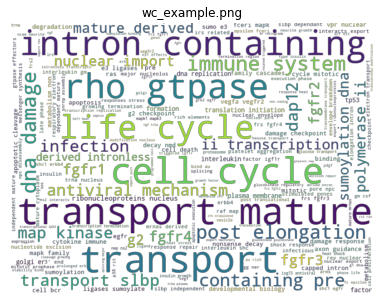

In [18]:
# we can use a word cloud to view what terms are enriched
word_cloud = create_wordcloud(reactome_only)
word_cloud.plot('wc_example.png')

In [19]:
df1 = pd.DataFrame(list(word_cloud.word_dict.items()), 
                   columns=['words', 'counts'])

df1.sort_values('counts', ascending=False, inplace=True)
display(df1.head(20))
print(df1.shape)

,words,counts
292,transport,12
290,transport mature,12
327,cell cycle,11
116,rho gtpase,10
229,intron containing,10
287,life cycle,9
348,dna damage,8
41,immune system,8
78,post elongation,7
224,containing pre,7


(394, 2)


In [20]:
display(reactome_only.head(15))

,term_name,rank,combined_score,adj_p_value,genes,n_genes,sample_id,category,db,significant_flag
257058,Processing of Capped Intro...,1,116.21,4.39e-21,"DDX39B,DHX9,FUS,HNRNPA0,HN...",48,48hr,proteomics_up,Reactome_2016,True
233500,Processing of Capped Intro...,1,106.90,3.19e-19,"CPSF1,CSTF1,CWC15,EFTUD2,E...",46,24hr,proteomics_up,Reactome_2016,True
233501,Gene Expression_hsa,2,102.14,1.22e-18,"AIMP2,ANP32A,ATF2,ATR,BNIP...",152,24hr,proteomics_up,Reactome_2016,True
257059,mRNA Splicing - Major Path...,2,94.85,8.37e-19,"DHX9,FUS,HNRNPA0,HNRNPA1,H...",38,48hr,proteomics_up,Reactome_2016,True
257060,Gene Expression_hsa,3,92.14,4.73e-17,"ANP32A,APEH,BAZ1B,BDP1,BOP...",147,48hr,proteomics_up,Reactome_2016,True
257061,mRNA Splicing_hsa,4,90.06,9.03e-18,"DHX9,FUS,HNRNPA0,HNRNPA1,H...",38,48hr,proteomics_up,Reactome_2016,True
257062,Metabolism of proteins_hsa,5,82.65,2.50e-15,"APEH,APOA1,ARF4,ATP5A1,ATP...",108,48hr,proteomics_up,Reactome_2016,True
233502,mRNA Splicing - Major Path...,3,72.89,3.09e-14,"CPSF1,CSTF1,CWC15,EFTUD2,E...",33,24hr,proteomics_up,Reactome_2016,True
233503,mRNA Splicing_hsa,4,68.91,2.31e-13,"CPSF1,CSTF1,CWC15,EFTUD2,E...",33,24hr,proteomics_up,Reactome_2016,True
233504,Cell Cycle_hsa,5,62.05,6.10e-10,"AKAP9,ATR,BANF1,CEP131,CNT...",62,24hr,proteomics_up,Reactome_2016,True


,rank,combined_score,adj_p_value,n_genes
count,574.00,574.00,5.74e+02,574.00
mean,81.85,16.50,8.95e-03,18.64
std,54.16,15.38,1.15e-02,15.32
min,1.00,0.15,4.39e-21,4.00
25%,36.25,6.67,1.55e-04,10.00
50%,72.50,12.20,3.37e-03,15.00
75%,123.75,22.10,1.52e-02,22.00
max,194.00,116.21,4.93e-02,152.00


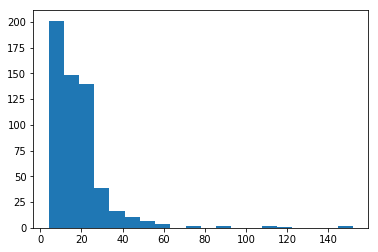

In [21]:
# let's look at the sizes of genes per term
plt.hist(reactome_only['n_genes'], bins=20)
display(reactome_only.describe())

In [22]:
display(reactome_only.sort_values('n_genes', ascending=False)[cols].head(20))

,term_name,rank,combined_score,n_genes,genes,sample_id
233501,Gene Expression_hsa,2,102.14,152,"AIMP2,ANP32A,ATF2,ATR,BNIP...",24hr
257060,Gene Expression_hsa,3,92.14,147,"ANP32A,APEH,BAZ1B,BDP1,BOP...",48hr
257106,Metabolism_hsa,49,19.91,118,"ABCC1,ACAA1,AKR1B15,ALB,AL...",48hr
233599,Metabolism_hsa,100,10.04,109,"AASDHPPT,ABCA1,ABCC1,ACACA...",24hr
257062,Metabolism of proteins_hsa,5,82.65,108,"APEH,APOA1,ARF4,ATP5A1,ATP...",48hr
257173,Immune System_hsa,116,8.31,91,"ACTR3,AP2B1,ARPC1A,ATP6V0A...",48hr
210798,Gene Expression_hsa,1,55.51,91,"AEBP2,ANP32A,ATF2,ATR,BMS1...",06hr
233569,Metabolism of proteins_hsa,70,18.28,75,"ADD1,CALR,CANX,CCT3,CCT6A,...",24hr
257063,Disease_hsa,6,56.88,71,"ALB,AP2B1,APC,BAD,BANF1,CA...",48hr
233529,Disease_hsa,30,34.19,63,"ACACA,BAD,BANF1,CALR,CANX,...",24hr


In [23]:
# Manually select terms with large number of genes that are not useful.
# This is based on person intuition. "Gene expression" and "metabolism" might be useful for some, but 
# here I will elimate as they are not descriptive enough to explain what the drug is doing.

not_useful = ['Gene Expression_hsa', 'Metabolism_hsa',
              'Disease_hsa', 'Metabolism of proteins_hsa',
              'Developmental Biology_hsa', 'Infectious disease_hsa'
             ]
reactome_only = reactome_only[~reactome_only['term_name'].isin(not_useful)]

display(reactome_only.sort_values('n_genes', ascending=False)[cols].head(15))

,term_name,rank,combined_score,n_genes,genes,sample_id
257173,Immune System_hsa,116,8.31,91,"ACTR3,AP2B1,ARPC1A,ATP6V0A...",48hr
233504,Cell Cycle_hsa,5,62.05,62,"AKAP9,ATR,BANF1,CEP131,CNT...",24hr
257065,Hemostasis_hsa,8,52.39,60,"ACTN1,ACTN4,AHSG,ALB,ALDOA...",48hr
257068,Post-translational protein...,11,48.63,56,"ARF4,CALR,CANX,CD59,COPA,C...",48hr
257066,Vesicle-mediated transport...,9,50.49,55,"ALB,APOA1,APOE,ARF4,CALR,C...",48hr
257171,Innate Immune System_hsa,114,8.34,53,"ACTR3,ARPC1A,BAD,C4A,C9,CD...",48hr
257080,Cell Cycle_hsa,23,32.75,51,"BANF1,BRCA2,CDK4,DKC1,EMD,...",48hr
233509,"Cell Cycle, Mitotic_hsa",10,50.94,51,"AKAP9,BANF1,CEP131,CNTRL,D...",24hr
257058,Processing of Capped Intro...,1,116.21,48,"DDX39B,DHX9,FUS,HNRNPA0,HN...",48hr
257072,Membrane Trafficking_hsa,15,42.05,47,"ARF4,CD59,CHMP7,COPA,COPG2...",48hr


In [24]:
# Now lets look at the first time point. 

test_df = et.filter_dataframe(reactome_only, sample_id='01hr')
display(test_df.head(15)[cols])

,term_name,rank,combined_score,n_genes,genes,sample_id
189000,Cell Cycle_hsa,1,36.51,28,"ACD,AKAP9,BRCA1,CDC16,CDC2...",01hr
189001,Interleukin-2 signaling_hsa,2,30.22,16,"AKAP9,BRAF,CNKSR2,CUL3,HAV...",01hr
189002,"Interleukin-3, 5 and GM-CS...",3,29.30,16,"AKAP9,BRAF,CNKSR2,CUL3,INP...",01hr
189003,"Cell Cycle, Mitotic_hsa",4,27.73,22,"AKAP9,CDC16,CDC20,CDC7,CLA...",01hr
189004,Interleukin receptor SHC s...,5,27.24,15,"AKAP9,BRAF,CNKSR2,CUL3,INP...",01hr
189005,MAPK family signaling casc...,6,26.44,16,"AKAP9,BRAF,CNKSR2,CUL3,DNA...",01hr
189006,Signaling by FGFR2_hsa,7,25.92,18,"AKAP9,BRAF,CNKSR2,CUL3,HNR...",01hr
189007,Insulin receptor signallin...,8,25.79,16,"AKAP9,BRAF,CNKSR2,CUL3,INS...",01hr
189008,Signalling by NGF_hsa,9,25.78,21,"AKAP13,AKAP9,ARHGEF16,BRAF...",01hr
189009,Signaling by Interleukins_hsa,10,24.45,19,"AKAP9,BRAF,CNKSR2,CUL3,HAV...",01hr


There are 76 enriched terms. If we look at the top ranked terms, we see that some fo them have similar descriptions "Interlekin...". If we look at the gene list, we can also see that some of the genes are similar. To see if there are redundant terms that are enriched, we can calculate their similarity with the Jaccard Index (intersection over union).
![width=50](https://wikimedia.org/api/rest_v1/media/math/render/svg/eaef5aa86949f49e7dc6b9c8c3dd8b233332c9e7)
<img src="https://upload.wikimedia.org/wikipedia/commons/c/c7/Intersection_over_Union_-_visual_equation.png" alt="Drawing" style="width: 300px;"/>

In [25]:
# et.find_similar_terms calculate the Jaccard Index and returns a ranked dataframe of terms and scores.
# Higher scores means more similar terms
d = et.find_similar_terms('Cell Cycle_hsa', test_df)
display(d.head(10))

,term_name,similarity_score
2,"Cell Cycle, Mitotic_hsa",0.79
70,Meiotic synapsis_hsa,0.18
60,SUMO E3 ligases SUMOylate ...,0.17
63,SUMOylation_hsa,0.17
65,Signaling by Rho GTPases_hsa,0.17
58,Immune System_hsa,0.13
57,Cytokine Signaling in Immu...,0.11
4,MAPK family signaling casc...,0.07
1,"Interleukin-3, 5 and GM-CS...",0.07
8,Signaling by Interleukins_hsa,0.07


In [26]:
d = et.find_similar_terms('Interleukin-2 signaling_hsa', test_df)
display(d.head(10))

,term_name,similarity_score
3,Interleukin receptor SHC s...,0.94
1,"Interleukin-3, 5 and GM-CS...",0.88
19,FRS-mediated FGFR2 signali...,0.88
14,GRB2 events in EGFR signal...,0.88
24,MAPK1/MAPK3 signaling_hsa,0.88
23,Signalling to p38 via RIT ...,0.88
22,Frs2-mediated activation_hsa,0.88
21,ARMS-mediated activation_hsa,0.88
27,Signalling to RAS_hsa,0.88
28,VEGFR2 mediated cell proli...,0.88


In [27]:
d = et.find_similar_terms('MAPK family signaling cascades_hsa', test_df)
display(d.head(10))

,term_name,similarity_score
19,FRS-mediated FGFR2 signali...,0.88
12,SOS-mediated signalling_hsa,0.88
21,ARMS-mediated activation_hsa,0.88
24,MAPK1/MAPK3 signaling_hsa,0.88
25,Prolonged ERK activation e...,0.88
18,FRS-mediated FGFR3 signali...,0.88
17,SHC1 events in EGFR signal...,0.88
16,FRS-mediated FGFR4 signali...,0.88
15,FRS-mediated FGFR1 signali...,0.88
14,GRB2 events in EGFR signal...,0.88


We can do this for all terms and view the results in a distance matrix.

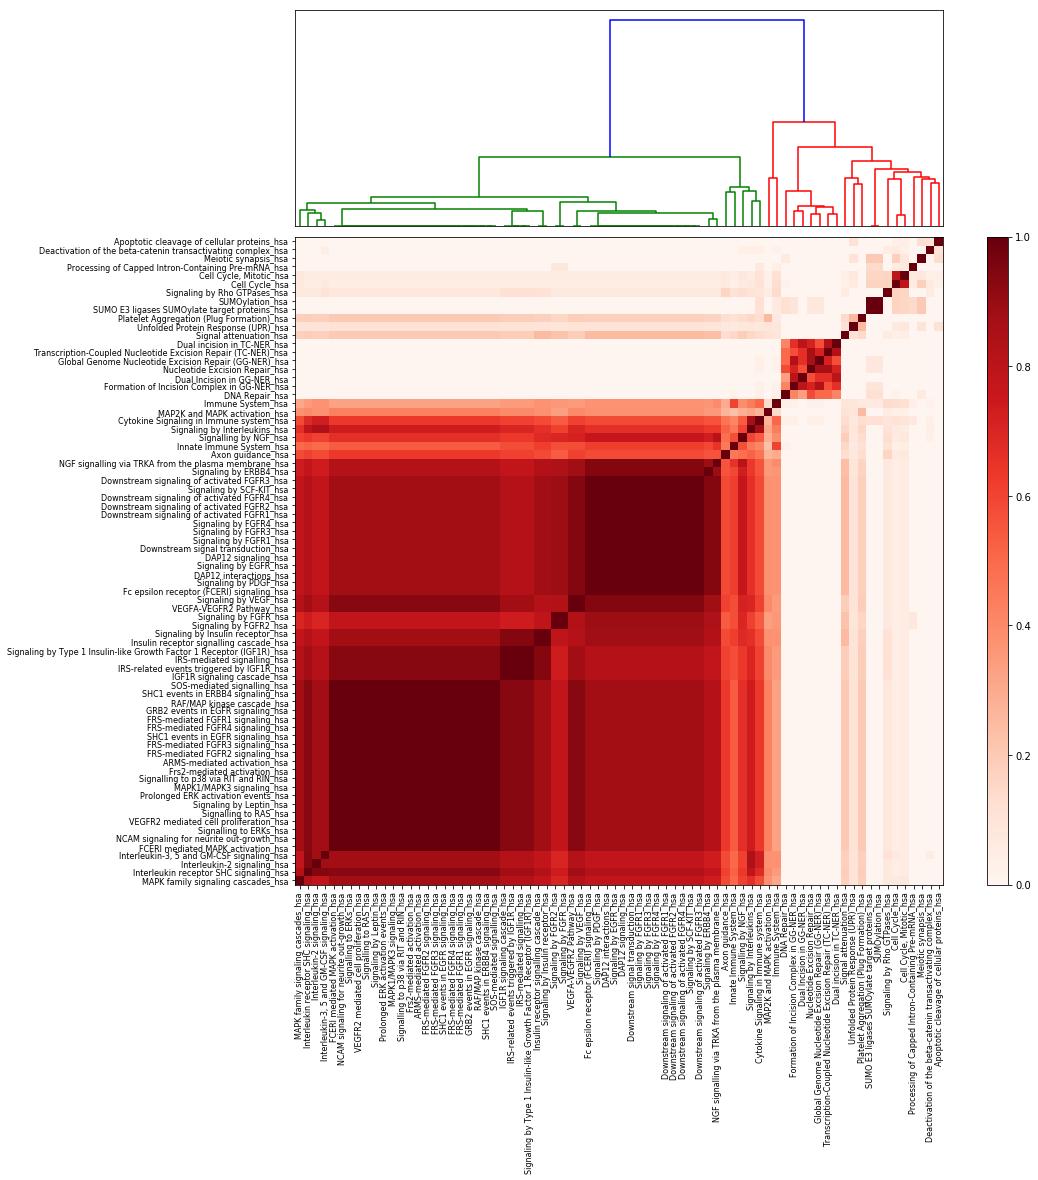

In [28]:
et.dist_matrix(test_df, fig_size=(15,15));

The dark red represents terms that are highly similar. We can filter all highly similar terms from the matrix.

In [29]:
test_df1 = et.filter_similar_terms(test_df, threshold=.9)

Number of rows went from 76 to 20


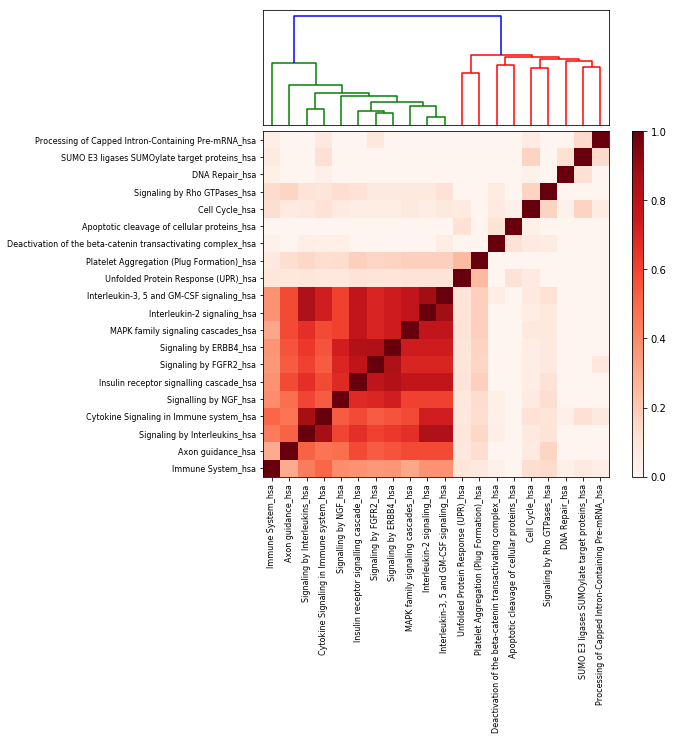

In [30]:
et.dist_matrix(test_df1);

Number of rows went from 76 to 14


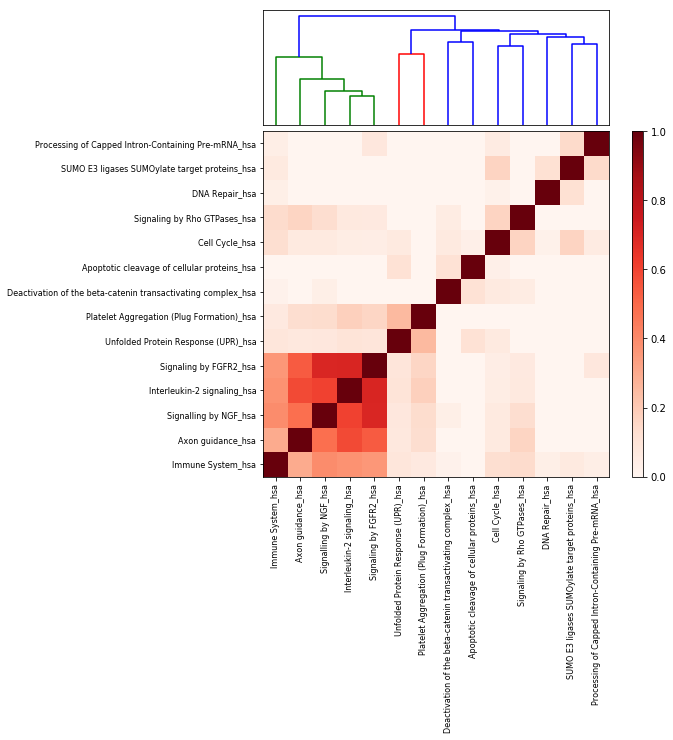

In [31]:
test_df2 = et.filter_similar_terms(test_df, threshold=.7)
et.dist_matrix(test_df2);

In [32]:
display(test_df2[cols].head(15))

,term_name,rank,combined_score,n_genes,genes,sample_id
189000,Cell Cycle_hsa,1,36.51,28,"ACD,AKAP9,BRCA1,CDC16,CDC2...",01hr
189001,Interleukin-2 signaling_hsa,2,30.22,16,"AKAP9,BRAF,CNKSR2,CUL3,HAV...",01hr
189006,Signaling by FGFR2_hsa,7,25.92,18,"AKAP9,BRAF,CNKSR2,CUL3,HNR...",01hr
189008,Signalling by NGF_hsa,9,25.78,21,"AKAP13,AKAP9,ARHGEF16,BRAF...",01hr
189032,Axon guidance_hsa,33,20.51,22,"AKAP9,ARPC1A,BRAF,CLASP2,C...",01hr
189056,Deactivation of the beta-c...,57,14.53,6,"APC,CBY1,CHD8,HDAC1,TLE3,Y...",01hr
189059,Immune System_hsa,60,12.59,43,"AKAP9,ARPC1A,BRAF,CALR,CAP...",01hr
189062,SUMO E3 ligases SUMOylate ...,63,9.93,7,"BRCA1,NUP188,NUP88,PIAS1,S...",01hr
189063,DNA Repair_hsa,64,9.57,12,"BRCA1,CUL4A,CUL4B,ERCC4,ER...",01hr
189067,Signaling by Rho GTPases_hsa,68,8.90,14,"AKAP13,ARHGAP12,ARHGEF16,A...",01hr


Number of rows went from 76 to 12


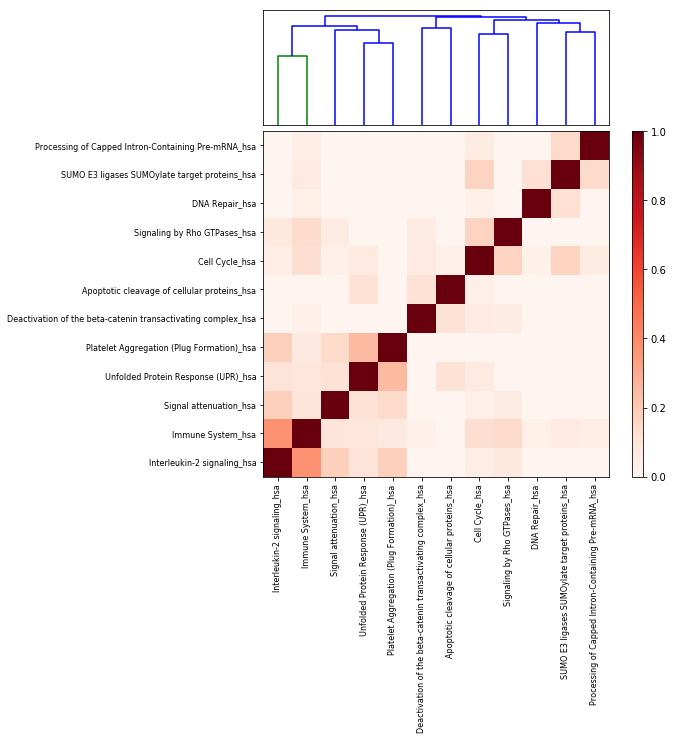

In [33]:
test_df3 = et.filter_similar_terms(test_df, threshold=.5, verbose=False)
et.dist_matrix(test_df3);

In [34]:
display(test_df3[cols])

,term_name,rank,combined_score,n_genes,genes,sample_id
189000,Cell Cycle_hsa,1,36.51,28,"ACD,AKAP9,BRCA1,CDC16,CDC2...",01hr
189001,Interleukin-2 signaling_hsa,2,30.22,16,"AKAP9,BRAF,CNKSR2,CUL3,HAV...",01hr
189049,Signal attenuation_hsa,50,17.55,4,"INSR,IRS2,MAPK3,SHC1",01hr
189056,Deactivation of the beta-c...,57,14.53,6,"APC,CBY1,CHD8,HDAC1,TLE3,Y...",01hr
189059,Immune System_hsa,60,12.59,43,"AKAP9,ARPC1A,BRAF,CALR,CAP...",01hr
189062,SUMO E3 ligases SUMOylate ...,63,9.93,7,"BRCA1,NUP188,NUP88,PIAS1,S...",01hr
189063,DNA Repair_hsa,64,9.57,12,"BRCA1,CUL4A,CUL4B,ERCC4,ER...",01hr
189067,Signaling by Rho GTPases_hsa,68,8.90,14,"AKAP13,ARHGAP12,ARHGEF16,A...",01hr
189071,Unfolded Protein Response ...,72,8.08,6,"CALR,DCTN1,LMNA,NFYC,SHC1,...",01hr
189072,Processing of Capped Intro...,73,7.81,9,"DDX5,FIP1L1,HNRNPA1,HNRNPM...",01hr


In [35]:

network = nx.read_gpickle('Data/cisplatin_based_network.p')

In [36]:
term_net, mol_net = nt.create_subnetwork(test_df3['term_name'],test_df2,
                                         network,  'entire_network')

('Cell Cycle_hsa', 28)
('Interleukin-2 signaling_hsa', 16)
('Signal attenuation_hsa', 0)
('Deactivation of the beta-catenin transactivating complex_hsa', 6)
('Immune System_hsa', 43)
('SUMO E3 ligases SUMOylate target proteins_hsa', 7)
('DNA Repair_hsa', 12)
('Signaling by Rho GTPases_hsa', 14)
('Unfolded Protein Response (UPR)_hsa', 6)
('Processing of Capped Intron-Containing Pre-mRNA_hsa', 9)
('Platelet Aggregation (Plug Formation)_hsa', 4)
('Apoptotic cleavage of cellular proteins_hsa', 4)
Looking for direct edges
No edges between Cell Cycle_hsa and Signal attenuation_hsa
No edges between Cell Cycle_hsa and Apoptotic cleavage of cellular proteins_hsa
No edges between SUMO E3 ligases SUMOylate target proteins_hsa and Platelet Aggregation (Plug Formation)_hsa
No edges between SUMO E3 ligases SUMOylate target proteins_hsa and Unfolded Protein Response (UPR)_hsa
No edges between SUMO E3 ligases SUMOylate target proteins_hsa and Signal attenuation_hsa
No edges between SUMO E3 ligases SUM

In [37]:
view.display_graph(term_net)

In [48]:
view.render_graph(mol_net)

In [39]:
view.render_graph(mol_net, add_parent=True)

In [40]:
from magine.networks.visualization.igraph_tools import create_igraph_figure
create_igraph_figure(mol_net, 'test.png', cluster=True)

(<igraph.drawing.Plot at 0x1bda92b0>,
 <Layout with 43 vertices and 2 dimensions>)

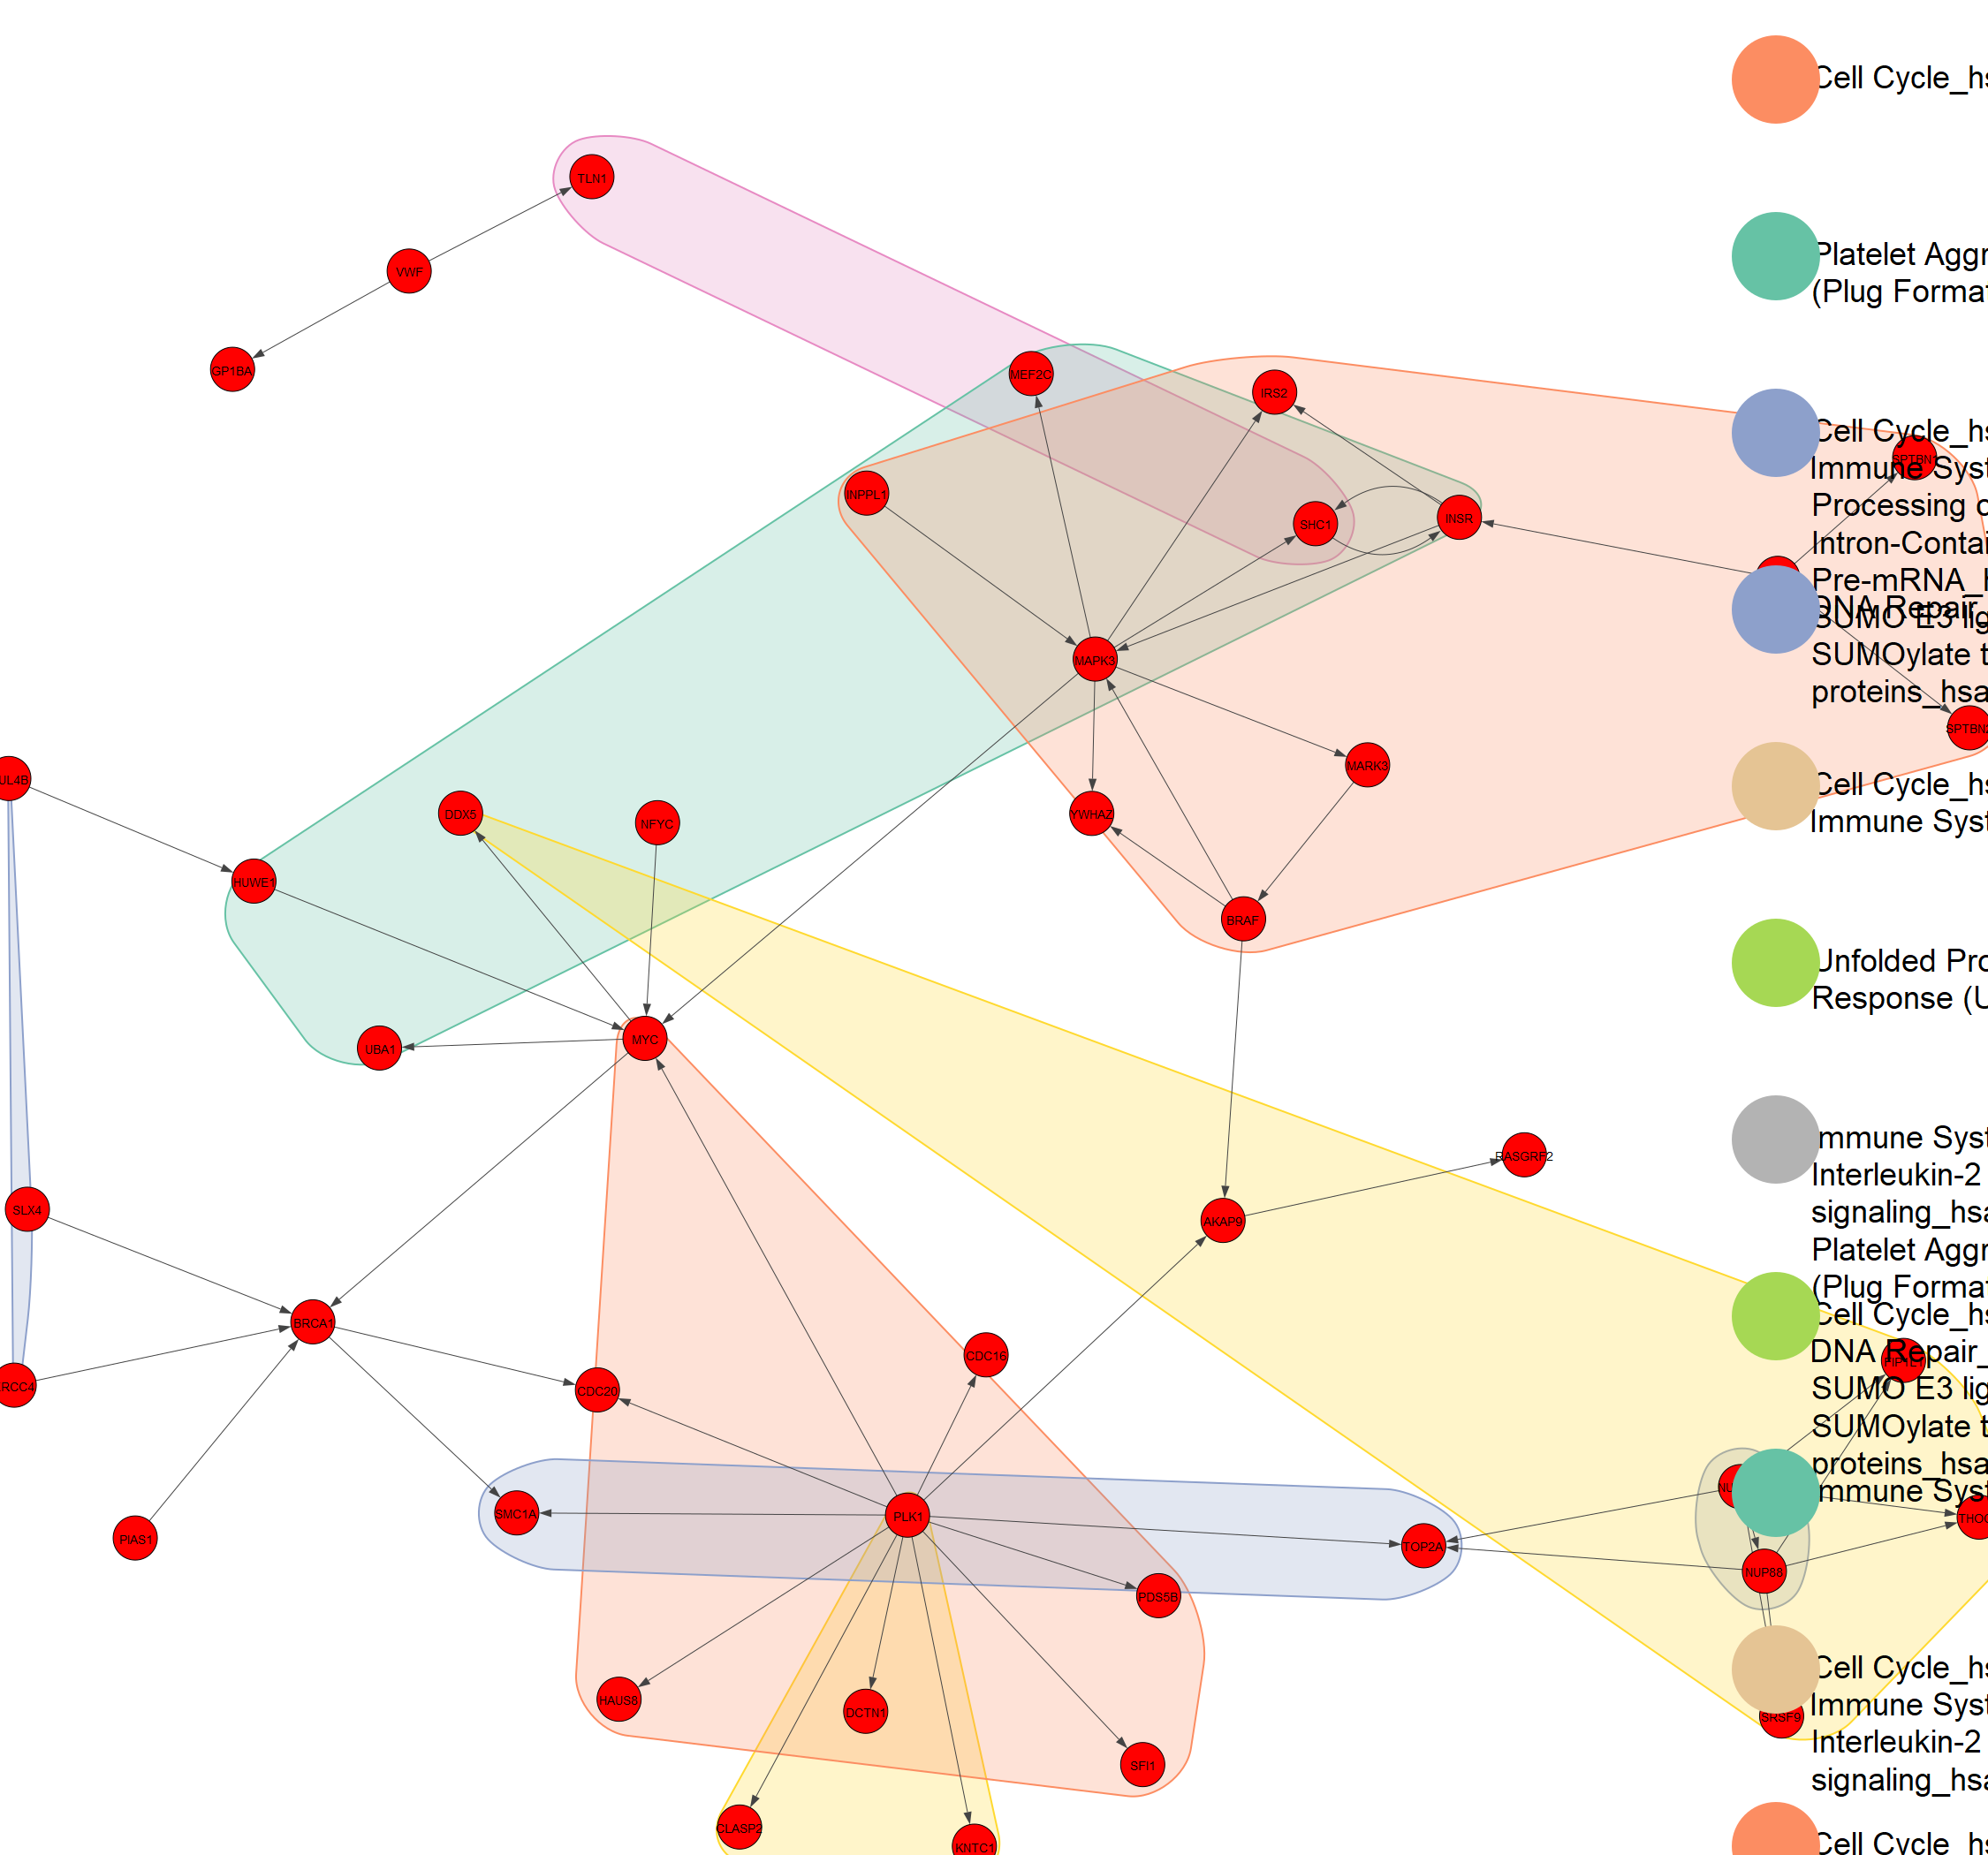

In [41]:

Image('test.png', width=400)

In [ ]:
from exp_data import exp_data

In [21]:
exp_data.create_table_of_data(write_latex=True, save_name='cisplatin_measured')
exp_data.create_table_of_data(write_latex=True, sig=True, save_name='sig_cisplatin_measured')
exp_data.create_table_of_data(write_latex=True, sig=True, unique=True, save_name='sig_unique_cisplatin_measured')

Install pdflatex to compile to pdf or png
You can use the csv file for use in outside tools
Install pdflatex to compile to pdf or png
You can use the csv file for use in outside tools
Install pdflatex to compile to pdf or png
You can use the csv file for use in outside tools


time,01hr,06hr,24hr,48hr,Total Unique Across
data_type,,,,,
C18,527.0,227.0,657.0,6.9e+02,1410
HILIC,472.0,606.0,934.0,6.2e+02,1511
label_free,196.0,46.0,271.0,8.7e+02,1085
ph_silac,514.0,888.0,1227.0,8.5e+02,2278
rna_seq,73.0,1999.0,12215.0,-,12340
silac,38.0,52.0,228.0,2.7e+02,485


In [42]:
from magine.networks.network_subgraphs import NetworkSubgraphs
net_sub = NetworkSubgraphs(network)

In [43]:
print(len(mol_net))
new_g = net_sub.expand_neighbors(mol_net, 
                                 nodes=mol_net.nodes(), up_stream=True, down_stream=True,
                                 include_list=exp_data.list_metabolites)
print(len(new_g))

43
Removing from list
99


In [44]:
view.render_graph(new_g)

In [45]:
from magine.networks.visualization.igraph_tools import paint_network_overtime

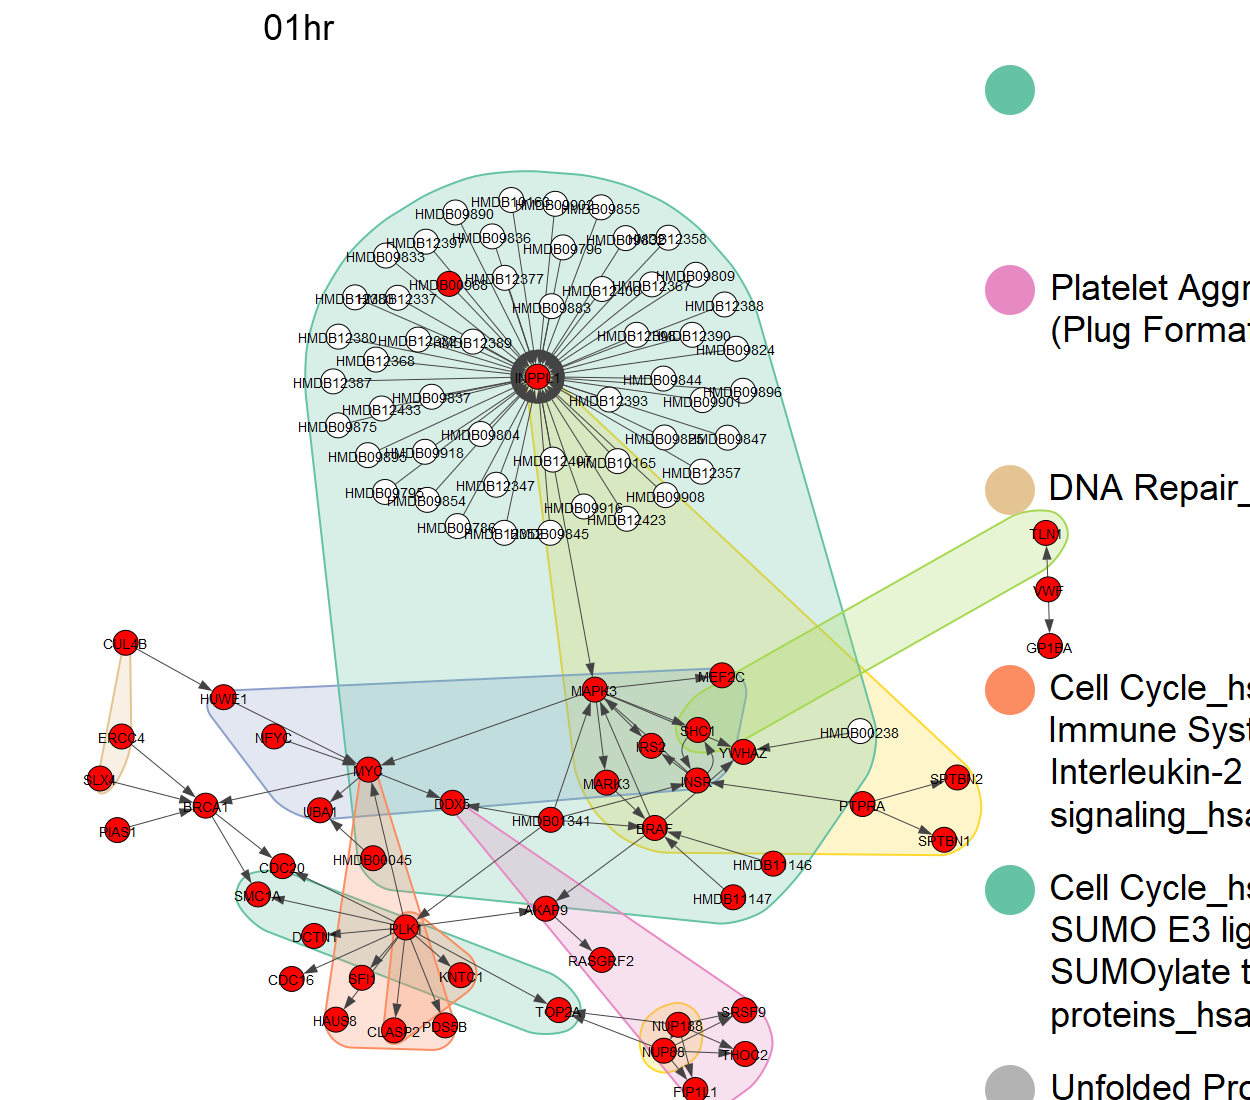

KeyboardInterrupt: 

In [46]:
paint_network_overtime(new_g, exp_data=exp_data, save_name='metabolites', color_list='red')

# STOP HERE

In [ ]:
# Here we can filter term_names that have very similar gene sets. 
# We use the piccard index and remove the less enriched terms.

slimmed = et.filter_similar_terms(reactome_only, 
                                  threshold=0.7, 
                                  verbose=False, 
                                  )
display(slimmed[cols].head(15))

In [ ]:
df1 = et.filter_similar_terms(
    et.filter_dataframe(reactome_only, sample_id='01hr'), 
    threshold=.7
)
df2 = et.filter_similar_terms(
    et.filter_dataframe(reactome_only, sample_id='06hr'), 
    threshold=.7
)
df3 = et.filter_similar_terms(
    et.filter_dataframe(reactome_only, sample_id='24hr'), 
    threshold=.7
)
df4 = et.filter_similar_terms(
    et.filter_dataframe(reactome_only, sample_id='48hr'), 
    threshold=.7
)

In [ ]:
hits = list(df1['term_name']) + list(df2['term_name']) + list(df3['term_name']) + list(df4['term_name'])

In [ ]:
slimmed = reactome_only[reactome_only['term_name'].isin(hits)].copy()
print(slimmed.shape)
slimmed = et.remove_redundant(slimmed)
print(slimmed.shape)
fig = heatmap_from_array(slimmed,
                         convert_to_log=True,
                         fig_size=(8, 8))

In [ ]:
# We can use et.filter_dataframe to select which data to look at
process_dbs = [
        'GO_Biological_Process_2017',
        'Humancyc_2016',
        'Reactome_2016',
        'KEGG_2016',
        'NCI-Nature_2016',
        'Panther_2016',
        'WikiPathways_2016',
]
test = et.filter_dataframe(enrichment_array, 
                           p_value=0.05, # only sig pvalues
                           combined_score=1.0, # score threshold of positive values 
                           db=process_dbs, # Only reactome db
                           category='proteomics_up', # from this category
                           rank=25
                          )

In [ ]:
test2 = et.filter_similar_terms(test)
et.dist_matrix2(test2, fig_size=(5, 5));

In [ ]:
et.dist_matrix(slimmed, fig_size=(14, 14));

In [ ]:
print(reactome_only.shape)

at_least_2 = tools.filter_by_minimum_sig_columns(reactome_only, 
                                                 index='term_name', 
                                                 columns='sample_id',
                                                 min_terms=3
                                                )

print(at_least_2.shape)
display(at_least_2.sort_values('term_name'))
heatmap_from_array(at_least_2, annotate_sig=True);

In [ ]:
go_only = et.filter_dataframe(enrichment_array, 
                              p_value=0.05, # only sig pvalues
                              combined_score=0.0, 
                              db=['GO_Biological_Process_2017',
                                  'GO_Molecular_Function_2017',
                                  'GO_Cellular_Component_2017',],
                              category='proteomics_up'
                             )

print(go_only.shape)
at_least_2 = tools.filter_by_minimum_sig_columns(go_only, 
                                                 index='term_name', 
                                                 columns='sample_id',
                                                 min_terms=1
                                                )
at_least_2 = et.remove_redundant(at_least_2)
print(at_least_2.shape)
heatmap_from_array(at_least_2, annotate_sig=True, fig_size=(6,16));

In [ ]:
fig = heatmap_from_array(reactome_only,
                         convert_to_log=True,
                         fig_size=(8, 8))

fig.savefig('enrichment.png', dpi=300, bbox_inches='tight')

In [ ]:

fig = heatmap_from_array(reactome_only, 
                         convert_to_log=True, 
                         cluster_col=False, 
                         cluster_row=True, 
                         fig_size=(8, 8))

fig.savefig('cluster_enrichment.png', dpi=300, bbox_inches='tight')

In [ ]:
# lets define a subset of all possible databases to look at.
process_dbs = [
        'GO_Biological_Process_2017',
        'Humancyc_2016',
        'Reactome_2016',
        'KEGG_2016',
        'NCI-Nature_2016',
        'Panther_2016',
        'WikiPathways_2016',
]

drug_dbs = ['DrugMatrix', 'Drug_Perturbations_from_GEO_2014']

In [ ]:
drug_df = et.filter_dataframe(enrichment_array, 
                              p_value=0.05,
                              combined_score=0.0,
                              rank=25,
                              db=drug_dbs)
print(drug_df.shape)

In [ ]:
wordcloud_drugs = create_wordcloud(drug_df)
wordcloud_drugs.plot(save_name='word_cloud_rna_drug_dbs')

In [ ]:
sig_array = et.filter_dataframe(enrichment_array,
                                p_value=0.05, 
                                combined_score=5.0, 
                                rank=25,
                                db=process_dbs
                               )
print(sig_array.shape)
display(sig_array.head(10))

In [ ]:
sig_array = et.filter_similar_terms(sig_array, threshold=0.7)

In [ ]:
sig_array = et.filter_dataframe(enrichment_array,
                                p_value=0.05, 
                                combined_score=5.0, 
                                rank=25,
                                db='GO_Biological_Process_2017'
                               )
sig_array = et.filter_similar_terms(sig_array, threshold=0.7)
wordcloud = create_wordcloud(sig_array)
wordcloud.plot(save_name='wordcloud_array_go')

In [ ]:
sig_array = et.filter_dataframe(enrichment_array,
                                p_value=0.05, 
                                combined_score=5.0, 
                                rank=25,
                                db='KEGG_2016'
                               )
sig_array = et.filter_similar_terms(sig_array, threshold=0.7)
wordcloud = create_wordcloud(sig_array)
wordcloud.plot(save_name='wordcloud_array_kegg')

In [ ]:
sig_array = et.filter_dataframe(enrichment_array,
                                p_value=0.05, 
                                combined_score=5.0, 
                                rank=25,
                                db='WikiPathways_2016'
                               )
sig_array = et.filter_similar_terms(sig_array, threshold=0.7)
wordcloud = create_wordcloud(sig_array)
wordcloud.plot(save_name='wordcloud_array_wiki')

In [ ]:
sig_array = et.filter_similar_terms(sig_array, threshold=0.7)
wordcloud = create_wordcloud(sig_array)
wordcloud.plot(save_name='wordcloud_array')

In [ ]:
fig = heatmap_from_array(sig_array, 
                         convert_to_log=True, 
                         cluster_col=False, 
                         cluster_row=True, 
                         fig_size=(8, 8))

fig.savefig('enrichment_example3.png', dpi=300, bbox_inches='tight')